# Introducción a la inferencia Bayesiana con Python

*Esta notebook fue creada originalmente como un blog post por [Raúl E. López Briega](http://relopezbriega.com.ar/) en [Matemáticas, análisis de datos y python](http://relopezbriega.github.io). El contenido esta bajo la licencia BSD.*

<img alt="Teorema de Bayes" title="Teorema de Bayes" src="http://relopezbriega.github.io/images/bayes.jpg" >

> "Las preguntas más importantes de la vida son, en su mayor parte, nada más que problemas de probabilidad."

***[Pierre-Simon Lapace](https://es.wikipedia.org/wiki/Pierre-Simon_Laplace)***

## Introducción: La incertidumbre y el problema de la inducción

¿Cómo se deben evaluar las hipótesis?¿Cuál es el papel de la evidencia en este proceso?¿Cuáles son los experimentos que debemos realizar para obtener la mayor información posible?. Éstas son preguntas que están en los cimientos de toda búsqueda científica. 
Las hipótesis científicas tienen un carácter general en relación con las observaciones empíricas que se supone deben explicar, teniendo implicaciones sobre fenómenos y acontecimientos que no podemos encontrar en ninguna evidencia real. Existe, por lo tanto, un vacío lógico entre la información derivada de la observación empírica y el contenido de nuestras teorías científicas. ¿Cómo, entonces, esta información nos da una confianza razonable en esas teorías? Éste, es el tradicional [problema de la inducción](https://es.wikipedia.org/wiki/Problema_de_la_inducci%C3%B3n).

[David Hume](https://es.wikipedia.org/wiki/David_Hume), demostró correctamente, que partiendo solamente de las evidencias del pasado y del presente, no podemos inferir con seguridad nada sobre el futuro. Que hayamos visto solamente miles de cisnes blancos, no quiere decir que todos los cisnes sean blancos; siempre existirá la *posibilidad* de que podamos encontrar un cisne negro que *falsifique* toda nuestra teoría. Este problema, hace que en esencia todas las teorías tengan un carácter [probabilístico](relopezbriega.github.io/blog/2016/11/26/introduccion-a-la-teoria-de-probabilidad-con-python/). 
Desde hace ya tiempo se considera que las teorías científicas se extienden más allá de cualquier dato experimental y por lo tanto no pueden ser verificadas (es decir, logicamente implicadas) por ellos. Si bien existe un consenso en que la certeza absoluta no puede ser nunca alcanzable; la mayoría de los científicos coinciden en que las teorías pueden alcanzar un estado intermedio entre la certeza absoluta y la falsificación; el cual dependerá de la calidad de las observaciones y de cómo la teoría se ve afectada por nuevas evidencias. Desde esta perspectiva, entonces la pregunta crucial pasa a ser ¿cómo adaptamos nuestras creencias a medida que vamos incorporando nuevas evidencias sobre nuestras teorías? la respuesta a esta pregunta, la podemos encontrar en el [teorema de Bayes](https://es.wikipedia.org/wiki/Teorema_de_Bayes).


## El Teorema de Bayes

[Thomas Bayes](https://es.wikipedia.org/wiki/Thomas_Bayes) fue un ministro presbiteriano y matemático inglés que estudió la relación íntima que existe entre la [probabilidad](http://relopezbriega.github.io/blog/2016/11/26/introduccion-a-la-teoria-de-probabilidad-con-python/), la predicción y el progreso científico. Su trabajo se centró principalmente en cómo formulamos nuestras creencias probabilísticas sobre el mundo que nos rodea cuando nos encontramos con nuevos datos o evidencias. El argumento de [Bayes](https://es.wikipedia.org/wiki/Thomas_Bayes) no es que el mundo es intrínsecamente probabilístico o incierto, ya que él era un creyente en la divina perfección; sino que aprendemos sobre el mundo a través de la aproximación, acercándonos cada vez más a la verdad a medida que recogemos más evidencias. Este argumento lo expresó matemáticamente a través de su famoso [teorema](https://es.wikipedia.org/wiki/Teorema_de_Bayes):


$$P(H|D) = \frac{P(D|H)P(H)}{P(D)}
$$


En donde:

* $P(H)$ es el **[a priori](https://es.wikipedia.org/wiki/Probabilidad_a_priori)**, la forma de introducir conocimiento previo sobre los valores que puede tomar la hipótesis. A veces cuando no sabemos demasiado se suelen usar *a prioris* que asignan igual probabilidad a todos los valores de la hipótesis; otras veces se puede elegir *a prioris* que restrinjan los valores a rangos razonables, por ejemplo solo valores positivos; y otras veces contamos con información mucho más precisa, como experimentos previos o límites impuesto por alguna teoría.


* $P(D|H)$ es el **likelihood**, la forma de incluir nuestros datos en el análisis. Es una expresión matemática que especifica la plausibilidad de los datos. A medida que la cantidad de datos aumenta, el *likelihood* tiene cada vez más peso en los resultados. Debemos tener en cuenta que si bien el *likelihood* se asemeja a una *probabilidad*, en realidad no lo es; el *likelihood* de una hipótesis $H$, dados los datos $D$ va a ser proporcional a la *probabilidad* de obtener $D$ dado que $H$ es verdadera. Como el *likelihood* no es una *probabilidad* tampoco tiene que respetar las leyes de las probabilidades y por lo tanto no necesariamente tiene que sumar 1.


* $P(H|D)$ es el **[a posteriori](https://es.wikipedia.org/wiki/Probabilidad_a_posteriori)**, la [distribución de probabilidad](http://relopezbriega.github.io/blog/2016/06/29/distribuciones-de-probabilidad-con-python/) final para la hipótesis. Es la consecuencia lógica de haber usado un conjunto de datos, un *likelihood* y un *a priori*. Se lo suele pensar como la versión actualizada del *a priori* luego de que hemos agregado los datos adicionales.


* $P(D)$ es el **likelihood marginal** o **evidencia**, la probabilidad de observar los datos $D$ promediado sobre todas las posibles hipótesis $H$. En general, la *evidencia* puede ser vista como una simple constante de normalización que en la mayoría de los problemas prácticos puede omitirse sin demasiada perdida de generalidad. 

Si los fundamentos filosóficos del [teorema de Bayes](https://es.wikipedia.org/wiki/Teorema_de_Bayes) son sorprendentemente ricos, sus matemáticas son increíblemente simples. En su forma más básica, no es más que una expresión algebraica con tres variables conocidas y una incógnita; y que trabaja con [probabilidades condicionales](https://es.wikipedia.org/wiki/Probabilidad_condicionada); nos dice la probabilidad de que una hipótesis $H$ sea verdadera si algún evento $D$ ha sucedido. El [teorema de Bayes](https://es.wikipedia.org/wiki/Teorema_de_Bayes) es útil porque lo que normalmente sabemos es la [probabilidad](http://relopezbriega.github.io/blog/2016/11/26/introduccion-a-la-teoria-de-probabilidad-con-python/) de los efectos dados las causas, pero lo que queremos saber es la [probabilidad](http://relopezbriega.github.io/blog/2016/11/26/introduccion-a-la-teoria-de-probabilidad-con-python/) de las causas dadas los efectos. Por ejemplo, podemos saber cual es el porcentaje de pacientes con gripe que tiene fiebre, pero lo que realmente queremos saber es la probabilidad de que un paciente con fiebre tenga gripe. El [teorema de Bayes](https://es.wikipedia.org/wiki/Teorema_de_Bayes) nos permite ir de uno a otro con suma facilidad.

## La inferencia Bayesiana

Toda forma de [inferencia](https://es.wikipedia.org/wiki/Inferencia) que realicemos sobre el mundo que nos rodea, debe indefectiblemente lidiar con la *incertidumbre*. Existen por lo menos, tres tipos de *incertidumbre* con la que nos debemos enfrentar:

* **Ignorancia**, los límites de nuestro conocimiento nos llevan a ser ignorantes sobre muchas cosas. 
* **Aleatoriedad**, es imposible negar la influencia del azar en casi todo lo que nos rodea; incluso aunque podamos saber todo sobre una moneda y la forma de lanzarla, es imposible predecir con anterioridad si va a caer cara o seca.
* **Vaguedad**, muchos de los conceptos que utilizamos en nuestro pensamiento tienen cierto grado de subjetividad en su definición. ¿cómo calificaríamos si una persona es valiente o no?. Cada uno de nosotros puede tener una apreciación diferente del concepto de valentía.

La [inferencia bayesiana](https://es.wikipedia.org/wiki/Inferencia_bayesiana) es la filosofía que afirma que para entender la opinión humana como debe ser, limitada por la ignorancia y la incertidumbre; debemos utilizar al [cálculo de probabilidad](http://relopezbriega.github.io/blog/2016/11/26/introduccion-a-la-teoria-de-probabilidad-con-python/) como la herramienta más importante para representar la fortaleza de nuestras creencias.

En esencia, la [inferencia bayesiana](https://es.wikipedia.org/wiki/Inferencia_bayesiana) combina nuestra experiencia previa, en la forma de la *probabilidad [a priori](https://es.wikipedia.org/wiki/Probabilidad_a_priori)*; con los datos observados, en la forma del *likelihood*; para interpretarlos y arribar a una *probabilidad [a posteriori](https://es.wikipedia.org/wiki/Probabilidad_a_posteriori)*. La [inferencia bayesiana](https://es.wikipedia.org/wiki/Inferencia_bayesiana) no nos va a garantizar que podamos alcanzar la respuesta correcta. En su lugar, nos va a proporcionar la [probabilidad](http://relopezbriega.github.io/blog/2016/11/26/introduccion-a-la-teoria-de-probabilidad-con-python/) de que cada una de un número de respuestas alternativas, sea verdadera. Y luego podemos utilizar esta información para encontrar la respuesta que más probablemente sea la correcta. En otras palabras, nos proporciona un mecanismo para hacer una especie de *adivinación basada en información*.


### Bayes en el diagnostico médico

Para que quede más claro, ilustremos la aplicación de la [inferencia bayesiana](https://es.wikipedia.org/wiki/Inferencia_bayesiana) con un simple ejemplo del diagnostico médico, uno de los campos dónde más éxito ha tenido. Supongamos que nos hicimos un estudio y nos ha dado positivo para una rara enfermedad que solo el 0.3 % de la población tiene. La tasa de efectividad de este estudio es del 99 %, es decir, que solo da [falsos positivos](https://es.wikipedia.org/wiki/Errores_de_tipo_I_y_de_tipo_II) en el 1 % de los casos. ¿Cuán probable es que realmente tengamos la enfermedad?. 

En un principio, nos veríamos tentados a responder que hay un 99 % de probabilidad de que tengamos la enfermedad; pero en este caso nos estaríamos olvidando del concepto importante del *[a priori](https://es.wikipedia.org/wiki/Probabilidad_a_priori)*. Sabemos con anterioridad que la enfermedad es extremadamente rara (solo el 0.3 % la tiene); si incluimos esta información previa en nuestro cálculo de probabilidad y aplicamos el [teorema de Bayes](https://es.wikipedia.org/wiki/Teorema_de_Bayes) podemos llegar a una conclusión totalmente distinta.

$$ P(\text{ enfermedad | pos}) = \frac{P(\text{ pos | enfermedad})P( \text{enfermedad})}{P(\text{pos})}$$



In [1]:
# Ejemplo simple teorema de Bayes aplicado a estimación de un sólo parámetro.
a_priori = 0.003
likelihood = 0.99
evidencia = 0.01

a_posteriori = likelihood * a_priori / evidencia
a_posteriori

0.297

Como vemos, luego de aplicar el [teorema de Bayes](https://es.wikipedia.org/wiki/Teorema_de_Bayes) llegamos a la conclusión de que en realidad nuestra probabilidad de estar realmente enfermo es de sólo 30 % y no de 99 %, ya que podemos ser uno de los [falsos positivos](https://es.wikipedia.org/wiki/Errores_de_tipo_I_y_de_tipo_II) del estudio y la enfermedad es realmente muy rara. Como este ejemplo demuestra, la inclusión del *[a priori](https://es.wikipedia.org/wiki/Probabilidad_a_priori)* es sumamente importante para la  [inferencia bayesiana](https://es.wikipedia.org/wiki/Inferencia_bayesiana), por lo cual también debemos ser sumamente cuidadosos a la hora de elegirla. **Cuando nuestra *[a priori](https://es.wikipedia.org/wiki/Probabilidad_a_priori)* es fuerte, puede ser sorprendentemente resistente frente a nuevas evidencias.**

## Redes Bayesianas

El [teorema de Bayes](https://es.wikipedia.org/wiki/Teorema_de_Bayes) nos permite actualizar las probabilidades de variables cuyo estado no hemos observado dada una serie de nuevas observaciones. Las [redes bayesianas](https://es.wikipedia.org/wiki/Red_bayesiana) automatizan este proceso, permitiendo que el razonamiento avance en cualquier dirección a través de la red de variables. Las [redes bayesianas](https://es.wikipedia.org/wiki/Red_bayesiana) están constituidas por una estructura en forma de [grafo](https://es.wikipedia.org/wiki/Grafo), en la que cada <a href="https://es.wikipedia.org/wiki/V%C3%A9rtice_(teor%C3%ADa_de_grafos)">nodo</a> representa [variables aleatorias](https://es.wikipedia.org/wiki/Variable_aleatoria) (discretas o continuas) y cada <a href="https://es.wikipedia.org/wiki/Arista_(teor%C3%ADa_de_grafos)">arista</a> representa las conexiones directas entre ellas. Estas conexiones suelen representar relaciones de causalidad. Adicionalmente, las [redes bayesianas](https://es.wikipedia.org/wiki/Red_bayesiana) también modelan el peso cuantitativo de las conexiones entre las  variables, permitiendo que las *creencias probabilísticas* sobre ellas se actualicen automáticamente a medida que se disponga de nueva información.
Al construir una [red bayesiana](https://es.wikipedia.org/wiki/Red_bayesiana), los principales problemas de modelización que surgen son:
1. ¿Cuáles son las variables? ¿Cuáles son sus valores / estados?
2. ¿Cuál es la estructura del [grafo](https://es.wikipedia.org/wiki/Grafo)?
3. ¿Cuáles son los parámetros (probabilidades)?

Profundicemos un poco en cada uno de estos puntos.

### Nodos y variables
Lo primero que debemos hacer es identificar las variables de interés. Sus valores deben ser mutuamente excluyentes y exhaustivos. Los tipos de <a href="https://es.wikipedia.org/wiki/V%C3%A9rtice_(teor%C3%ADa_de_grafos)">nodos</a> discretos más comunes son:

* **Nodos booleanos**, que representan proposiciones tomando los valores binarios Verdadero (V) y Falso (F). En el dominio del diagnóstico médico, por ejemplo, un <a href="https://es.wikipedia.org/wiki/V%C3%A9rtice_(teor%C3%ADa_de_grafos)">nodo</a> llamado "Cáncer" podría representar la proposición del que paciente tenga cáncer. 
* **Valores ordenados** Por ejemplo, un <a href="https://es.wikipedia.org/wiki/V%C3%A9rtice_(teor%C3%ADa_de_grafos)">nodo</a> "Contaminación" podría representar la exposición de un paciente a la contaminación del ambiente y tomar los valores {alta, baja}.
* **Valores enteros**. Por ejemplo, un <a href="https://es.wikipedia.org/wiki/V%C3%A9rtice_(teor%C3%ADa_de_grafos)">nodo</a> llamado "Edad" puede representar la edad de un paciente y tener valores posibles de 1 a 120. 

Lo importante es elegir valores que representen el dominio de manera eficiente, pero con suficiente detalle para realizar el razonamiento requerido.

### Estructura
La estructura o topología de la [red](https://es.wikipedia.org/wiki/Red_bayesiana) debe captar las relaciones cualitativas entre las variables. En particular, dos nodos deben conectarse directamente si uno afecta o causa al otro, con la <a href="https://es.wikipedia.org/wiki/Arista_(teor%C3%ADa_de_grafos)">arista</a> indicando la dirección del efecto. Por lo tanto, en nuestro ejemplo de diagnóstico médico, podríamos preguntarnos qué factores afectan la probabilidad de tener cáncer. Si la respuesta es "Contaminación y Fumar", entonces deberíamos agregar <a href="https://es.wikipedia.org/wiki/Arista_(teor%C3%ADa_de_grafos)">aristas</a> desde "Contaminación" y desde "Fumador" hacia el <a href="https://es.wikipedia.org/wiki/V%C3%A9rtice_(teor%C3%ADa_de_grafos)">nodo</a> "Cáncer". Del mismo modo, tener cáncer afectará la respiración del paciente y las posibilidades de tener un resultado positivo de rayos X. Por lo tanto, también podemos agregar <a href="https://es.wikipedia.org/wiki/Arista_(teor%C3%ADa_de_grafos)">aristas</a> de "Cáncer" a "Disnea" y "RayosX".

Es deseable construir [redes bayesianas](https://es.wikipedia.org/wiki/Red_bayesiana) lo más compactas posibles por tres razones. Primero, mientras más compacto es el *modelo*, es más fácil de manejar. Segundo, cuando las redes se vuelven demasiado densas, fallan en representar la independencia en forma explícita. Y Tercero, las redes excesivamente densas no suelen representar las dependencias causales del dominio.

### Probabilidades condicionales
Una vez que tenemos definida la estructura de la [red bayesiana](https://es.wikipedia.org/wiki/Red_bayesiana), el siguiente paso es cuantificar las relaciones entre los nodos interconectados; esto se hace especificando una [probabilidad condicional](https://es.wikipedia.org/wiki/Probabilidad_condicionada) para cada nodo. 
Primero, para cada nodo necesitamos mirar todas las posibles combinaciones de valores de los nodos padres. 
Por ejemplo, continuando con el ejemplo del diagnostico del cáncer, si tomamos el <a href="https://es.wikipedia.org/wiki/V%C3%A9rtice_(teor%C3%ADa_de_grafos)">nodo</a> "Cáncer" con sus dos <a href="https://es.wikipedia.org/wiki/V%C3%A9rtice_(teor%C3%ADa_de_grafos)">nodos</a> padres "Contaminación" y "Fumador" podemos calcular los posibles valores conjuntos { (A, V), (A, F), (B, V), (B, F)}. La tabla de probabilidad condicional especifica para cada uno de estos casos podría ser la siguiente: {0,05, 0,02, 0,03, 0,001}. Con estos datos, ya estamos en condiciones de representar el [grafo](https://es.wikipedia.org/wiki/Grafo) de la [red bayesiana](https://es.wikipedia.org/wiki/Red_bayesiana) de nuestro ejemplo.

<img alt="Red Bayesiana" title="Red Bayesiana" src="http://relopezbriega.github.io/images/red_bayes.png" >

### Razonando con redes Bayesianas
La tarea básica de cualquier sistema de [inferencia probabilística](https://es.wikipedia.org/wiki/Inferencia) es la de obtener la [distribución](http://relopezbriega.github.io/blog/2016/06/29/distribuciones-de-probabilidad-con-python/) [a posteriori](https://es.wikipedia.org/wiki/Probabilidad_a_posteriori) para cada conjunto de <a href="https://es.wikipedia.org/wiki/V%C3%A9rtice_(teor%C3%ADa_de_grafos)">nodos</a>. Esta tarea se llama *actualización de creencia* o [inferencia probabilística](https://es.wikipedia.org/wiki/Inferencia). En el caso de las [redes bayesianas](https://es.wikipedia.org/wiki/Red_bayesiana), el proceso de [inferencia](https://es.wikipedia.org/wiki/Inferencia) es muy flexible, nueva evidencia puede ser introducida en cualquiera de los <a href="https://es.wikipedia.org/wiki/V%C3%A9rtice_(teor%C3%ADa_de_grafos)">nodos</a> mientras que las *creencias* son actualizadas en cualquiera de los otros <a href="https://es.wikipedia.org/wiki/V%C3%A9rtice_(teor%C3%ADa_de_grafos)">nodos</a>. En la práctica, la velocidad del proceso de inferencia va a depender de la estructura y complejidad de la red.


## Programación probabilística y PyMC3

A pesar de que las [redes bayesianas](https://es.wikipedia.org/wiki/Red_bayesiana) y demás modelos de [inferencia bayesiana](https://es.wikipedia.org/wiki/Inferencia_bayesiana) son conceptualmente simples; a menudo los cálculos de sus probabilidades conducen a expresiones que no se pueden resolver en forma analítica. Durante muchos años, este fue un gran problema y fue probablemente una de las principales razones que obstaculizaron la adopción de los métodos bayesianos. La llegada de las computadoras y el desarrollo de métodos numéricos que se pueden aplicar para calcular la distribución *[a posteriori](https://es.wikipedia.org/wiki/Probabilidad_a_posteriori)* de casi cualquier modelo, han transformado completamente la práctica del [análisis de datos](http://relopezbriega.github.io/category/analisis-de-datos.html) Bayesiano. 

La posibilidad de automatizar la [inferencia probabilística](https://es.wikipedia.org/wiki/Inferencia) ha conducido al desarrollo de la [Programación probabilística](https://en.wikipedia.org/wiki/Probabilistic_programming_language), la cuál utiliza las ventajas de los lenguajes de programación modernos y nos permite realizar una clara separación entre la creación del modelo y el proceso de  [inferencia](https://es.wikipedia.org/wiki/Inferencia). En [Programación probabilística](https://en.wikipedia.org/wiki/Probabilistic_programming_language), especificamos un modelo probabilístico completo escribiendo unos cuantos líneas de código y luego la inferencia se realiza en forma automática. 

### PyMC3

[PyMC3](https://pymc-devs.github.io/pymc3/index.html) es un paquete para [Programación probabilística](https://en.wikipedia.org/wiki/Probabilistic_programming_language) que utiliza el lenguaje de programación [Python](http://python.org/). [PyMC3](https://pymc-devs.github.io/pymc3/index.html) es lo suficientemente maduro para resolver muchos de los principales problemas estadísticos. Permite crear modelos probabilísticos usando una sintaxis intuitiva y fácil de leer que es muy similar a la sintaxis usada para describir modelos probabilísticos.

Veamos algunos ejemplos:

#### El problema de la moneda
Los problemas de monedas son clásicos cuando hablamos de [probabilidad y estadística](http://relopezbriega.github.io/category/pobabilidad-y-estadistica.html), nos permiten ejemplificar conceptos abstractos de forma simple. Asimismo, pueden ser muchas veces conceptualmente similares a situaciones *reales*, de hecho cualquier problema en donde obtengamos resultados binarios, 0/1, enfermo/sano, spam/no-spam, puede ser pensado como si estuviéramos hablando de monedas. 
En este caso, la idea es utilizar un modelo [bayesiano](https://es.wikipedia.org/wiki/Inferencia_bayesiana) para inferir si la moneda se encuentra sesgada o no.

Para este ejemplo, vamos a utilizar una la [distribución binomial](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_binomial) como *likelihood* y una [distribución beta](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_beta) como *[a priori](https://es.wikipedia.org/wiki/Probabilidad_a_priori)*. Veamos como lo podemos modelar con [PyMC3](https://pymc-devs.github.io/pymc3/index.html).

In [2]:
# <!-- collapse=True -->
# importando modulos necesarios
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import pymc3 as pm
import theano.tensor as tt
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

np.random.seed(1984) #replicar random

%matplotlib inline

In [3]:
# El problema de la moneda
# de 100 lanzamientos 80 caras
n = 100
caras = 80

In [4]:
# Creación del modelo
niter = 2000
with pm.Model() as modelo_moneda:
    # a priori
    p = pm.Beta('p', alpha=2, beta=2)
    # likelihood
    y = pm.Binomial('y', n=n, p=p, observed=caras)

Applied logodds-transform to p and added transformed p_logodds to model.


In [6]:
# Realizando el muestreo para la inferencia
with modelo_moneda:
    trace = pm.sample(niter, njobs=4)

Assigned NUTS to p_logodds
 [-----------------100%-----------------] 2000 of 2000 complete in 2.6 sec

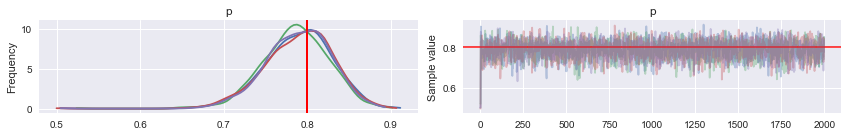

In [7]:
# Analizando los resultados
pm.traceplot(trace, varnames=['p'], lines={'p':.8})
pass

Como vemos el modelo nos indica que la moneda parece tener un claro sesgo hacia cara.

#### El problema de la hierba mojada
Supongamos que hay dos eventos los cuales pueden causar que la hierba esté húmeda: que el rociador esté activado o que esté lloviendo. También supongamos que la lluvia tiene un efecto directo sobre el uso del rociador (usualmente cuando llueve el rociador se encuentra apagado). Entonces la situación puede ser modelada con la siguiente [red bayesiana](https://es.wikipedia.org/wiki/Red_bayesiana).

<img alt="Red Bayesiana" title="Modelo Hierba mojada" src="https://upload.wikimedia.org/wikipedia/commons/9/97/Red_Bayesiana_Simple.png" >


In [8]:
# Problema de la hierba mojada
# https://es.wikipedia.org/wiki/Red_bayesiana#Ejemplo
niter = 10000  # 10000
tune = 5000  # 5000

modelo = pm.Model()

with modelo:
    tv = [1]
    lluvia = pm.Bernoulli('lluvia', 0.2, shape=1, testval=tv)
    rociador_p = pm.Deterministic('rociador_p', 
                                  pm.math.switch(lluvia, 0.01, 0.40))
    rociador = pm.Bernoulli('rociador', rociador_p, shape=1, testval=tv)
    hierba_mojada_p = pm.Deterministic('hierba_mojada_p', 
                pm.math.switch(lluvia, pm.math.switch(rociador, 0.99, 0.80),
                               pm.math.switch(rociador, 0.90, 0.0)))
    hierba_mojada = pm.Bernoulli('hierba_mojada', hierba_mojada_p,
                             observed=np.array([1]), shape=1)

    trace = pm.sample(20000, 
                      step=[pm.BinaryGibbsMetropolis([lluvia, rociador])], 
                      tune=tune, random_seed=124)

# pm.traceplot(trace)

dictionary = {
              'lluvia': [1 if ii[0] else 0 for ii in trace['lluvia'].tolist() ],
              'rociador': [1 if ii[0] else 0 for ii in trace['rociador'].tolist() ],
              'rociador_p': [ii[0] for ii in trace['rociador_p'].tolist()],
              'hierba_mojada_p': [ii[0] for ii in trace['hierba_mojada_p'].tolist()],
              }
df = pd.DataFrame(dictionary)

p_lluvia = df[(df['lluvia'] == 1)].shape[0] / df.shape[0]
print("\nProbabilidad de que la hierba este mojada por la lluvia: {0}"
      .format(p_lluvia))

p_rociador = df[(df['rociador'] == 1)].shape[0] / df.shape[0]
print("Probabilidad de que la hierba este mojada por el rociador: {0}"
      .format(p_rociador))


 [-----------------100%-----------------] 20000 of 20000 complete in 8.8 sec
Probabilidad de que la hierba este mojada por la lluvia: 0.38355
Probabilidad de que la hierba este mojada por el rociador: 0.62105


De acuerdo a los resultados de la [red bayesiana](https://es.wikipedia.org/wiki/Red_bayesiana), si vemos que la hierba esta mojada, la probabilidad de que este lloviendo es alrededor del 38%.

## Clasificador Bayes ingenuo

Uno de los clasificadores más utilizados en [Machine Learning](http://relopezbriega.github.io/category/machine-learning.html) por su simplicidad y rapidez, es el [Clasificador Bayes ingenuo](https://es.wikipedia.org/wiki/Clasificador_bayesiano_ingenuo). El cual es una técnica de clasificación supervisada basada en el [teorema de Bayes](https://es.wikipedia.org/wiki/Teorema_de_Bayes) que asume que existe una <a href="https://es.wikipedia.org/wiki/Independencia_(probabilidad)">independencia</a> entre los *atributos*. En términos simples, un [Clasificador Bayes ingenuo](https://es.wikipedia.org/wiki/Clasificador_bayesiano_ingenuo) asume que la presencia de una característica particular en una clase no está relacionada con la presencia de cualquier otra característica. Por ejemplo, una fruta puede considerarse como una manzana si es roja, redonda y de aproximadamente 9 cm de diámetro. Incluso si estas características dependen unas de otras o de la existencia de otras características, todas estas propiedades contribuyen independientemente a la probabilidad de que esta fruta sea una manzana. Se lo llama *ingenuo* ya que asumir <a href="https://es.wikipedia.org/wiki/Independencia_(probabilidad)">independencia</a> absoluta entre todos los atributos, no es algo que se suela dar en la realidad. 
El modelo [Bayes ingenuo](https://es.wikipedia.org/wiki/Clasificador_bayesiano_ingenuo) es fácil de construir y particularmente útil para conjuntos de datos muy grandes. A pesar de su simplicidad y de su *irealista* postulado de <a href="https://es.wikipedia.org/wiki/Independencia_(probabilidad)">independencia</a>, este clasificador se ha mostrado muy efectivo y se suele utilizar como el estándar para evaluar el rendimiento de otros modelos de [Machine Learning](http://relopezbriega.github.io/category/machine-learning.html).

El [Clasificador Bayes ingenuo](https://es.wikipedia.org/wiki/Clasificador_bayesiano_ingenuo) se utiliza en múltiples escenarios de la vida real, tales como:

* **Clasificación de texto:** Es uno de los algoritmos conocidos más exitosos cuando se trata de la clasificación de documentos de texto, es decir, si un documento de texto pertenece a una o más categorías (clases).
* **Detección de spam:** Es un ejemplo de clasificación de texto. Se ha convertido en un mecanismo popular para distinguir el correo electrónico spam del correo electrónico legítimo. 
* **Análisis de sentimientos:** Puede ser utilizado para analizar el tono de tweets, comentarios y revisiones, ya sean negativos, positivos o neutrales.
* **Sistema de Recomendaciones:** El algoritmo [Bayes ingenuo](https://es.wikipedia.org/wiki/Clasificador_bayesiano_ingenuo) en combinación con el filtrado colaborativo se utiliza para construir sistemas de recomendación híbridos que ayudan a predecir si un usuario desea un recurso determinado o no.

Veamos un ejemplo con la ayuda de [Scikit-Learn](http://scikit-learn.org/stable/):

Cantidad de errores de clasificación sobre un total de 105 casos: 7
Efectividad del algoritmo:  0.93


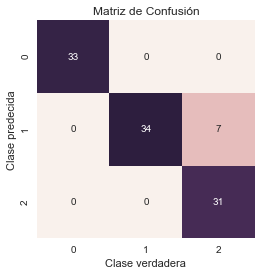

In [9]:
# Ejemplo Naive Bayes usuando iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
 
# Dividir los datos en entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, 
                                                    random_state=0)

# inicializar el clasificador Naive Bayes
bayes_ingenuo = GaussianNB()

# predicción 
y_pred = bayes_ingenuo.fit(X_train, y_train).predict(X_test)

# Matriz de confusión
cnf_matrix = confusion_matrix(y_test, y_pred)

print("Cantidad de errores de clasificación sobre un total de {0} casos: {1}"
      .format(y_test.shape[0],(y_test != y_pred).sum()))
print("Efectividad del algoritmo: {0: .2f}"
      .format(1 - (y_test != y_pred).sum()/y_test.shape[0]))

# Graficando la matriz de confusión
sns.heatmap(cnf_matrix.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Clase verdadera')
plt.ylabel('Clase predecida')
plt.title('Matriz de Confusión')
plt.show()

En este sencillo ejemplo, podemos ver como el [Clasificador Bayes ingenuo](https://es.wikipedia.org/wiki/Clasificador_bayesiano_ingenuo) ha clasificado correctamente la mayoría de los casos del dataset [iris](https://es.wikipedia.org/wiki/Iris_flor_conjunto_de_datos), obteniendo un efectividad del 93 %.

Debido a que los [clasificadores bayesianos ingenuos](https://es.wikipedia.org/wiki/Clasificador_bayesiano_ingenuo) hacen suposiciones tan estrictas acerca de los datos, generalmente no funcionarán tan bien con modelos más complicados. Dicho esto, tienen varias ventajas:

* Son extremadamente rápidos tanto para entrenamiento como para predicción
* Proporcionan una predicción probabilística directa
* A menudo son muy fácilmente interpretables
* Tienen muy pocos parámetros que necesiten optimizarse.

Estas ventajas significan que un [clasificador bayesiano ingenuo](https://es.wikipedia.org/wiki/Clasificador_bayesiano_ingenuo) es a menudo una buena opción como un modelo de clasificación inicial. Si obtenemos resultados satisfactorios, entonces tenemos un clasificador muy rápido, y muy fácil de interpretar. Si no funciona bien, entonces podemos comenzar a explorar modelos más sofisticados.

Aquí concluye esta introducción a la [inferencia bayesiana](https://es.wikipedia.org/wiki/Inferencia_bayesiana); como vemos es una teoría sumamente fascinante con serias implicancias filosóficas. La [teoría Bayesiana](https://es.wikipedia.org/wiki/Teorema_de_Bayes) es mucho más que un simple teorema de probabilidad, es una lógica para razonar sobre el amplio espectro de la vida que se encuentra en las áreas grises entre la *verdad absoluta* y la *incertidumbre total*. A menudo tenemos información sobre sólo una pequeña parte de lo que nos preguntamos.
Sin embargo, todos queremos predecir algo basado en nuestras experiencias pasadas; y adaptamos nuestras creencias a medida que adquirimos nueva información. La [inferencia bayesiana](https://es.wikipedia.org/wiki/Inferencia_bayesiana) nos proporciona una forma de pensar racionalmente sobre el mundo que nos rodea.

Saludos!

*Este post fue escrito utilizando [Jupyter notebook](http://jupyter.org/). Pueden descargar este [notebook](https://github.com/relopezbriega/relopezbriega.github.io/blob/master/downloads/BayesInf.ipynb) o ver su version estática en [nbviewer](http://nbviewer.ipython.org/github/relopezbriega/relopezbriega.github.io/blob/master/downloads/BayesInf.ipynb).*